# Data Science Unit 1 Sprint Challenge 2

# Storytelling with Data

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [181]:
df.head(50)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"
5,1999,actor,1/19/99,Acting,William Baldwin,"Acting, Comedy & Music"
6,1999,Singer-lyricist,1/20/99,Musician,Michael Stipe,"Acting, Comedy & Music"
7,1999,model,1/21/99,Media,Carmen Electra,Media
8,1999,actor,1/25/99,Acting,Matthew Lillard,"Acting, Comedy & Music"
9,1999,stand-up comedian,1/26/99,Comedy,David Cross,"Acting, Comedy & Music"


# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
1. Use pandas to make a **crosstab** of **`Year`** & **`Occupation`**. ([This documentation](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations) has examples and explanation.)
2. To get percentages instead of counts, use crosstab's **`normalize`** parameter to normalize over each _row._ ([This documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) describes the parameter and its options.)
3. You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [182]:
ct = pd.crosstab(df['Occupation'], df['Year'], normalize='columns')
ct

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",0.903614,0.739645,0.726115,0.622642,0.560241,0.384146,0.370370,0.360248,0.255319,0.207317,0.208589,0.351515,0.337423,0.268293,0.427711,0.392638,0.45
Government and Politics,0.012048,0.082840,0.038217,0.069182,0.102410,0.225610,0.160494,0.192547,0.170213,0.201220,0.208589,0.181818,0.165644,0.201220,0.126506,0.128834,0.17
Media,0.066265,0.124260,0.197452,0.264151,0.246988,0.274390,0.333333,0.291925,0.333333,0.469512,0.361963,0.303030,0.312883,0.317073,0.307229,0.325153,0.24
Other,0.018072,0.053254,0.038217,0.044025,0.090361,0.115854,0.135802,0.155280,0.241135,0.121951,0.220859,0.163636,0.184049,0.213415,0.138554,0.153374,0.14


# Part 2 — Recreate this explanatory visualization:

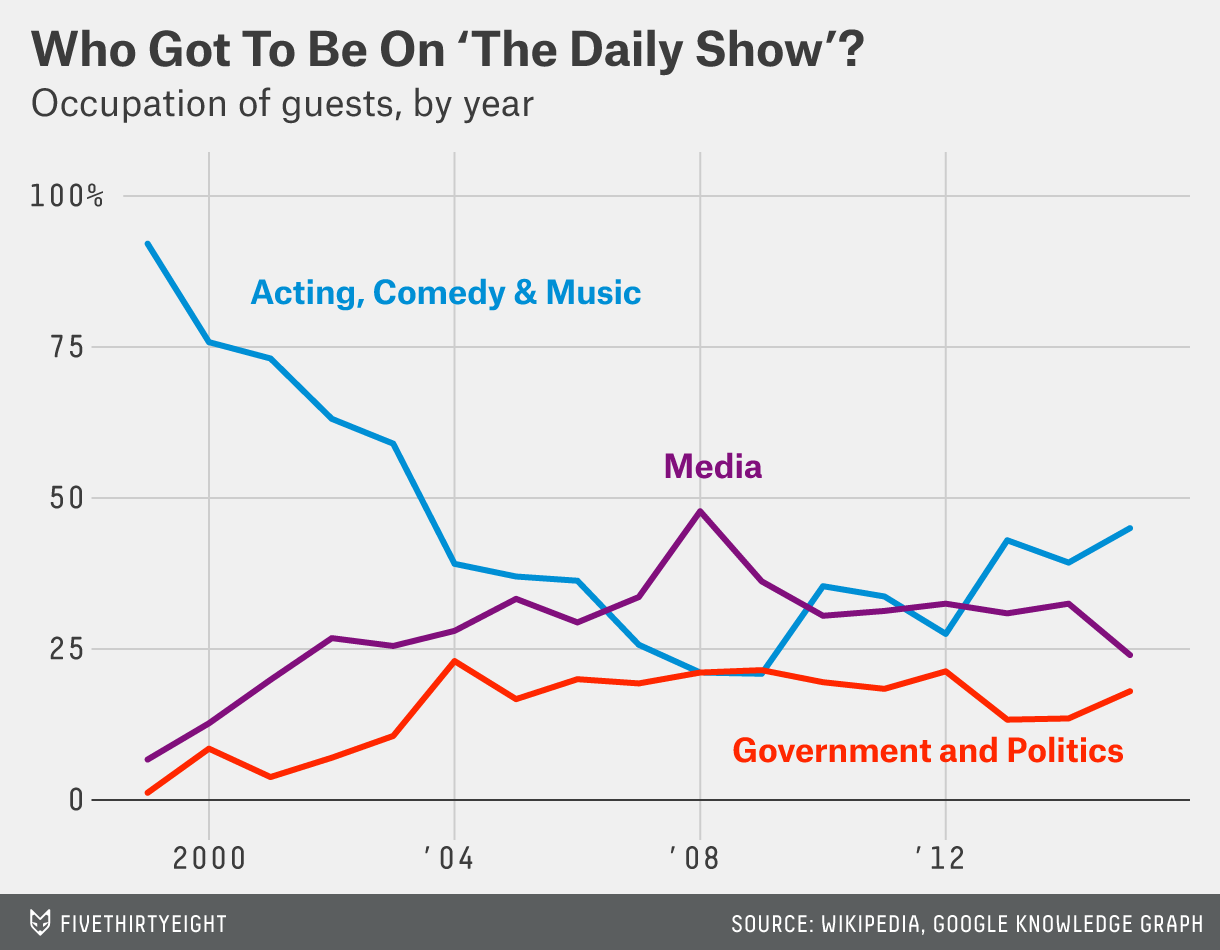

In [183]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)

**Hint:** use the crosstab you calculated in part 1!

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

Any visual element not specifically mentioned in the expectations is an optional bonus, but it's _not_ required to pass the Sprint Challenge.






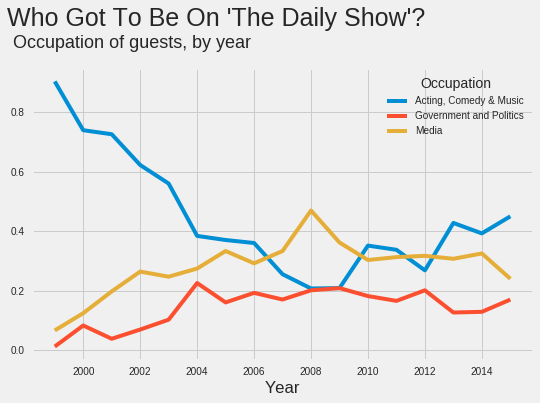

In [184]:
title = "Who Got To Be On 'The Daily Show'?"
sub = "Occupation of guests, by year"
dt= pd.crosstab(df['Year'], df['Occupation'], normalize='index')
dt = dt.drop(['Other'], axis=1)
plt.style.use('fivethirtyeight')
dt.plot.line(figsize=(8,5));
plt.suptitle(title, y=1.05, x=.4, fontsize=25)
plt.title(sub,y=1.05, x=.2, fontsize=18)
plt.show()

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Hint:** you can use the pandas `value_counts` method.

**Expectations:** This can be a simple, quick plot: exploratory, not explanatory. 

If you want, you can add titles and change aesthetics, but it's _not_ required to pass the Sprint Challenge.

In [228]:
(df.Guest.value_counts())

mvp = df.groupby('Guest').Show.count()
topten = mvp[mvp>9]
topten = topten.sort_values()
topten.head(10)

Guest
Bill O'Reilly     10
Reza Aslan        10
Richard Lewis     10
Will Ferrell      10
Tom Brokaw        12
Paul Rudd         13
Ricky Gervais     13
Brian Williams    16
Denis Leary       17
Fareed Zakaria    19
Name: Show, dtype: int64

Text(0.4,1.05,'Most Appearances on The Daily Show with Jon Stewart')

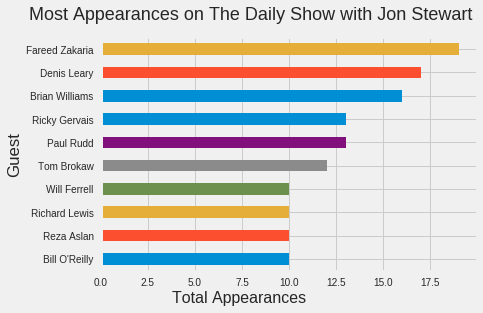

In [238]:
stars='Most Appearances on The Daily Show with Jon Stewart'
app='Total Appearances'
topten.plot.barh()
plt.suptitle(app, y=.0, x=.4, fontsize=16);
plt.title(stars,y=1.05, x=.4, fontsize=18)



Guest
Bill O'Reilly     10
Brian Williams    16
Denis Leary       17
Fareed Zakaria    19
Paul Rudd         13
Name: Show, dtype: int64

#How accurate is the data?





##Spot Check

If you were a research analyst at a company that was using this data set, how could you be sure that this data is accurate?

How do you really know if those 10 people appeared the most on The Daily Show?

First, I will take a sample of 10 random appearances and confirm that the interviews are on the Daily Show website with the same date and guest. 



In [187]:
df.sample(5)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
414,2001,actor,3/8/01,Acting,Javier Bardem,"Acting, Comedy & Music"
1754,2009,stand-up comedian,8/17/09,Comedy,David Cross,"Acting, Comedy & Music"
865,2004,Baseball player,12/7/04,Athletics,Paul O'Neill,Other
638,2002,actor,8/7/02,Acting,Vin Diesel,"Acting, Comedy & Music"
588,2002,actor,5/14/02,Acting,Liev Schreiber,"Acting, Comedy & Music"


http://www.cc.com/video-clips/vxjcaf/the-daily-show-with-jon-stewart-javier-bardem

http://www.cc.com/video-clips/12zgg5/the-daily-show-with-jon-stewart-david-cross

http://www.cc.com/video-clips/clgqri/the-daily-show-with-jon-stewart-paul-o-neill

http://www.cc.com/episodes/v4rhoe/the-daily-show-with-jon-stewart-august-7--2002---vin-diesel-season-7-ep-07019

http://www.cc.com/episodes/iox2o5/the-daily-show-with-jon-stewart-july-29--2010---liev-schreiber-season-15-ep-15095

http://www.cc.com/video-clips/qi4yuk/the-daily-show-with-jon-stewart-liev-schreiber

All of the samples checked out! Same guest and dates





##What about the rest?

 Ok, so we know that those 10 checked out, but what about the rest?
 
You could look for other datasets containing Daily Show guests for comparison.

https://github.com/geanders/RProgrammingForResearch/blob/master/data/daily_show_guests.csv

Unfortunately this is simply a copy of the dataset we currently have.

https://en.wikipedia.org/wiki/List_of_The_Daily_Show_episodes

Wikipedia seems to have a list, you could aslo read this data into a CSV.
 
You could write an HTML web parser to crawl the wesbite and confirm that videos are avialble for each entry.
  


Hoever, this still doesn't tell us enough, what if the show had guests that were not recorded, how would you catch that?

You would have to watch every show in the Daily Show's history. Let's do a bit of math to see how much time that would take, and how much it would cost.


In [0]:
shows = df.Show.nunique()

In [207]:
shows * 20

52780

In [0]:
day = 8 * 60

In [209]:
time = shows/day
time

5.497916666666667

Assuming 8 hours a day and 20 minute episodes, you could watch every episode of the show in about 5 and a half days. At 2x speed, which would be fine for simply recording guests, that goes down to less than three(3) days. Even if you paid someone 100 dollars a day for this work, a company could hire 10 people to check the data for 1000 dollars a day and gain a humungous increase of confidence in the accuracy of the data. If this data is beiung used for a major investment, it's a no brainer. Even for a small investment, it mayu very be a good use of your resources. Alternatively you could create a sample that each person would watch, further cutting down on your time. 

##Conclusion

While this data might seem to be accurate, the low cost of verifying the accuracy through other sources creates an oppurtunity to generate confidence in our data without sacrifing resources. It is strongly reccomended that further stpes be taken to ensure our data reflects the show before it is used to inform business decisions. 